In [ ]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
path = Path('.')
csv_path = path/'csvs_removed_cuts'
data_path = path/'data'
data_path.mkdir(exist_ok=True)

## Load or create df

In [ ]:
Z_MASS = 91.1876

def compute_zw(df):
    """Transform the dataframe to choose the best Z and W candidates"""
    df['ll'] = df[['mll12', 'mll13', 'mll23']].apply(lambda x: np.abs(x - Z_MASS).idxmin()[-2:], axis=1)
    df.insert(0, 'mLL', df.apply(lambda x: x[f'mll{x["ll"]}'], axis=1))
    df.insert(1, 'ptLL', df.apply(lambda x: x[f'ptll{x["ll"]}'], axis=1))
    df.insert(9, 'mtW', df.apply(lambda x: x[f"mtw{min(set('123') - set(x['ll']))}"], axis=1))
    df.drop(columns=['mll12', 'mll13', 'mll23', 'ptll12', 'ptll13', 'ptll23', 'mtw1', 'mtw2', 'mtw3', 'll'], inplace=True)
    return df

In [ ]:
def create_df():
    # Merge csvs into one dataframe
    # Add a column indicating the original dataframe
    df = pd.concat([pd.read_csv(f).assign(channel=f.name.split('.')[0].replace('_NC', ''))
                    for f in csv_path.glob("./*.csv")], ignore_index=True)
    if 'met_et' in df.columns:
        df.rename(columns={'met_et': 'etmiss'}, inplace=True)
    df = compute_zw(df)
    return df

In [ ]:
fname = 'df_removed_cuts.pkl'
if (data_path/fname).exists():
    df = pd.read_pickle(data_path/fname)
    print('Loaded df from pickle')
else:
    print('Creating df. This may take a while...')
    df = create_df()
    df.to_pickle(data_path/fname)
    print('Saved df to pickle')

Creating df...


In [ ]:
df.columns

Index(['mLL', 'ptLL', 'etmiss', 'mtW', 'lep1_pt', 'lep1_eta', 'lep1_E',
       'lep1_phi', 'lep1_ch', 'lep1_ID', 'lep2_pt', 'lep2_eta', 'lep2_E',
       'lep2_phi', 'lep2_ch', 'lep2_ID', 'lep3_pt', 'lep3_eta', 'lep3_E',
       'lep3_phi', 'lep3_ch', 'lep3_ID', 'weight', 'channel'],
      dtype='object')

In [ ]:
df

,mLL,ptLL,etmiss,mtW,lep1_pt,lep1_eta,lep1_E,lep1_phi,lep1_ch,lep1_ID,...,lep2_ch,lep2_ID,lep3_pt,lep3_eta,lep3_E,lep3_phi,lep3_ch,lep3_ID,weight,channel
0,85.5524,39.58350,31.03050,36.6092,47.3750,-0.843533,65.2533,-2.582390,1,13,...,-1,11,24.4166,0.350013,25.9278,1.461040,-1,13,1.000000,data
1,80.1701,140.01600,126.84100,55.6164,104.4710,1.543020,255.5580,-0.113786,1,11,...,-1,11,48.9745,-1.867970,162.3410,2.604810,1,11,1.000000,data
2,52.8418,23.72450,6.66471,25.0624,31.7622,2.311880,161.8680,1.247250,1,11,...,-1,11,23.5763,2.311010,120.0480,-2.843650,1,11,1.000000,data
3,90.0371,196.87300,24.21170,122.3100,213.0010,0.153930,215.5290,0.852691,-1,11,...,-1,11,42.3438,-0.765095,55.3536,-3.093180,1,11,1.000000,data
4,90.0252,31.83480,33.57490,82.0607,63.2524,0.664121,77.7216,-1.104620,1,11,...,-1,11,32.0984,0.777708,42.3047,1.891500,-1,11,1.000000,data
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066972,69.9391,9.24801,42.97790,102.0000,67.1413,1.977530,247.1910,-0.794692,1,13,...,1,13,26.1005,1.646430,70.2253,-0.173807,-1,13,0.700318,single_antitop_wtchan
1066973,60.9325,56.57400,84.05210,82.5136,48.2207,-0.265584,49.9313,-2.536240,1,11,...,-1,11,20.5893,-0.892885,29.3568,-2.630850,1,13,0.833711,single_antitop_wtchan
1066974,123.8920,53.34590,47.52700,142.8320,110.6390,0.573461,129.3350,-1.352000,1,11,...,-1,11,21.4406,1.034110,33.9634,-1.077230,-1,11,1.152530,single_antitop_wtchan
1066975,101.7420,62.00330,42.05480,58.8889,89.9343,1.134350,154.2730,1.335360,1,13,...,-1,11,28.3058,1.835200,90.9456,-1.752400,-1,11,1.329200,single_antitop_wtchan


In [ ]:
df.describe(include='all')

,mLL,ptLL,etmiss,mtW,lep1_pt,lep1_eta,lep1_E,lep1_phi,lep1_ch,lep1_ID,...,lep2_ch,lep2_ID,lep3_pt,lep3_eta,lep3_E,lep3_phi,lep3_ch,lep3_ID,weight,channel
count,1.066977e+06,1.066977e+06,1.066977e+06,1.066977e+06,1.066977e+06,1.066977e+06,1.066977e+06,1.066977e+06,1066977.0,1066977.0,...,1066977.0,1066977.0,1.066977e+06,1.066977e+06,1.066977e+06,1.066977e+06,1066977.0,1066977.0,1.066977e+06,1066977
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,...,2.0,2.0,NaN,NaN,NaN,NaN,2.0,2.0,NaN,13
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,11.0,...,1.0,11.0,NaN,NaN,NaN,NaN,1.0,11.0,NaN,lllv
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,537653.0,563786.0,...,559855.0,555379.0,NaN,NaN,NaN,NaN,566000.0,533876.0,NaN,696970
mean,9.006378e+01,9.137448e+01,5.263274e+01,6.056979e+01,9.661050e+01,1.281718e-03,1.859581e+02,1.361446e-03,NaN,NaN,...,NaN,NaN,3.589611e+01,2.550325e-03,7.242752e+01,8.608176e-03,NaN,NaN,2.379945e+00,NaN
std,1.474271e+01,8.131500e+01,5.043367e+01,4.566665e+01,6.571676e+01,1.230645e+00,1.612574e+02,1.811513e+00,NaN,NaN,...,NaN,NaN,1.647626e+01,1.256435e+00,5.509872e+01,1.812414e+00,NaN,NaN,6.853001e+01,NaN
min,1.194720e-01,6.995730e-02,4.979800e-02,6.457160e-05,2.500090e+01,-2.499960e+00,2.522810e+01,-3.141590e+00,NaN,NaN,...,NaN,NaN,2.000000e+01,-2.499990e+00,2.000230e+01,-3.141590e+00,NaN,NaN,-3.034620e+03,NaN
25%,8.794320e+01,3.893340e+01,2.344100e+01,3.065400e+01,5.757050e+01,-9.352840e-01,8.438230e+01,-1.562040e+00,NaN,NaN,...,NaN,NaN,2.559590e+01,-9.746730e-01,3.631770e+01,-1.561220e+00,NaN,NaN,7.945750e-02,NaN
50%,9.059450e+01,6.792510e+01,3.999070e+01,5.763820e+01,7.662460e+01,6.060470e-03,1.347140e+02,4.077510e-03,NaN,NaN,...,NaN,NaN,3.165010e+01,1.009690e-02,5.359440e+01,2.052530e-02,NaN,NaN,1.353040e-01,NaN
75%,9.283930e+01,1.162690e+02,6.451250e+01,8.063260e+01,1.117270e+02,9.376160e-01,2.311460e+02,1.565360e+00,NaN,NaN,...,NaN,NaN,4.043040e+01,9.795800e-01,9.048980e+01,1.575950e+00,NaN,NaN,5.334370e-01,NaN


In [ ]:
channels = df['channel'].unique()
channels

array(['data', 'llvv', 'ZqqZll', 'WqqZll', 'lllv', 'Ztautau', 'Zee',
       'single_top_tchan', 'ttbar_lep', 'Zmumu', 'llll',
       'single_top_wtchan', 'single_antitop_wtchan'], dtype=object)

In [ ]:
len(channels)

13

In [ ]:
df.groupby('channel').size()

channel
WqqZll                      117
Zee                         748
Zmumu                       764
ZqqZll                      313
Ztautau                       5
data                       2429
llll                     363908
lllv                     696970
llvv                        148
single_antitop_wtchan        59
single_top_tchan              1
single_top_wtchan            65
ttbar_lep                  1450
dtype: int64

## Separate MCs from data

In [ ]:
mc_df = df[df['channel']!= 'data'].copy()
data_df = df[df['channel'] == 'data'].copy()

In [ ]:
len(mc_df), len(data_df)

(1064548, 2429)

In [ ]:
map_dict = {'WZ': ('lllv', 'lvvv', 'WqqZll', 'WlvZqq'),
            'ZZ, WW': ('WplvWmqq', 'WpqqWmlv', 'ZqqZll', 'llll', 'llvv'),
            'V+jets': ('Wplusenu', 'Wplusmunu', 'Wplustaunu', 'Wminusenu', 'Wminusmunu', 
                       'Wminustaunu', 'Ztautau', 'Zee', 'Zmumu'),
            'Other': ('ttbar_lep', 'single_top_tchan', 'single_antitop_tchan', 'single_top_wtchan', 
                      'single_antitop_wtchan', 'single_top_schan', 'single_antitop_schan'),
            'Data': ('data',)}

reversed_map_dict = {v: k for k, values in map_dict.items() for v in values if v in channels}

In [ ]:
# Create a new column in the dataframe named label which is 0 if reversed_map_dict[channel] is 'WZ' and 1 otherwise
mc_df['label'] = mc_df['channel'].map(lambda x: 1 if reversed_map_dict[x] == 'WZ' else 0)

In [ ]:
mc_df

,mLL,ptLL,etmiss,mtW,lep1_pt,lep1_eta,lep1_E,lep1_phi,lep1_ch,lep1_ID,...,lep2_ID,lep3_pt,lep3_eta,lep3_E,lep3_phi,lep3_ch,lep3_ID,weight,channel,label
2429,119.2240,54.97310,60.06330,82.2196,69.5654,-0.232487,71.4539,1.280750,1,11,...,13,22.2664,1.789180,68.4872,-2.588610,-1,11,-0.000000,llvv,0
2430,98.7745,36.70310,21.98420,13.9479,52.6680,1.295440,103.3970,-2.057810,-1,11,...,11,21.7605,0.247025,22.4281,1.705310,1,13,0.150721,llvv,0
2431,92.8197,53.10430,50.30410,79.6589,41.4355,-1.359860,86.0272,0.495999,1,13,...,11,23.1609,2.100850,96.0654,-1.409230,-1,13,0.130532,llvv,0
2432,96.9550,42.11510,56.70850,147.5520,96.1451,-1.708700,274.1530,-1.853350,-1,13,...,13,27.3095,-1.708920,77.8877,-1.852340,1,11,0.683634,llvv,0
2433,79.6824,40.05490,132.16800,143.9600,54.0603,0.367742,57.7570,-0.378674,-1,11,...,11,34.4599,0.116887,34.6957,-2.687050,1,13,0.124405,llvv,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066972,69.9391,9.24801,42.97790,102.0000,67.1413,1.977530,247.1910,-0.794692,1,13,...,13,26.1005,1.646430,70.2253,-0.173807,-1,13,0.700318,single_antitop_wtchan,0
1066973,60.9325,56.57400,84.05210,82.5136,48.2207,-0.265584,49.9313,-2.536240,1,11,...,11,20.5893,-0.892885,29.3568,-2.630850,1,13,0.833711,single_antitop_wtchan,0
1066974,123.8920,53.34590,47.52700,142.8320,110.6390,0.573461,129.3350,-1.352000,1,11,...,11,21.4406,1.034110,33.9634,-1.077230,-1,11,1.152530,single_antitop_wtchan,0
1066975,101.7420,62.00330,42.05480,58.8889,89.9343,1.134350,154.2730,1.335360,1,13,...,11,28.3058,1.835200,90.9456,-1.752400,-1,11,1.329200,single_antitop_wtchan,0


In [ ]:
mc_df[mc_df['label'] == 1].groupby('channel').size()

channel
WqqZll       117
lllv      696970
dtype: int64

In [ ]:
LUMI = 10064.0

with open(path/'original_hists/Files_base.txt') as f:
    file = f.readlines()
    
rescaling_factors = {}
for line in file:
    line = line.strip()
    if line.startswith('#'):
        continue
    if line:
        channel, cross_section, sum_weight, efficiency = line.split('|')
        rescaling_factors[channel] = LUMI * float(cross_section) / (float(sum_weight) * float(efficiency))

In [ ]:
mc_df['rescaled_weight'] = mc_df.apply(lambda x: x['weight'] * rescaling_factors[x['channel']], axis=1)

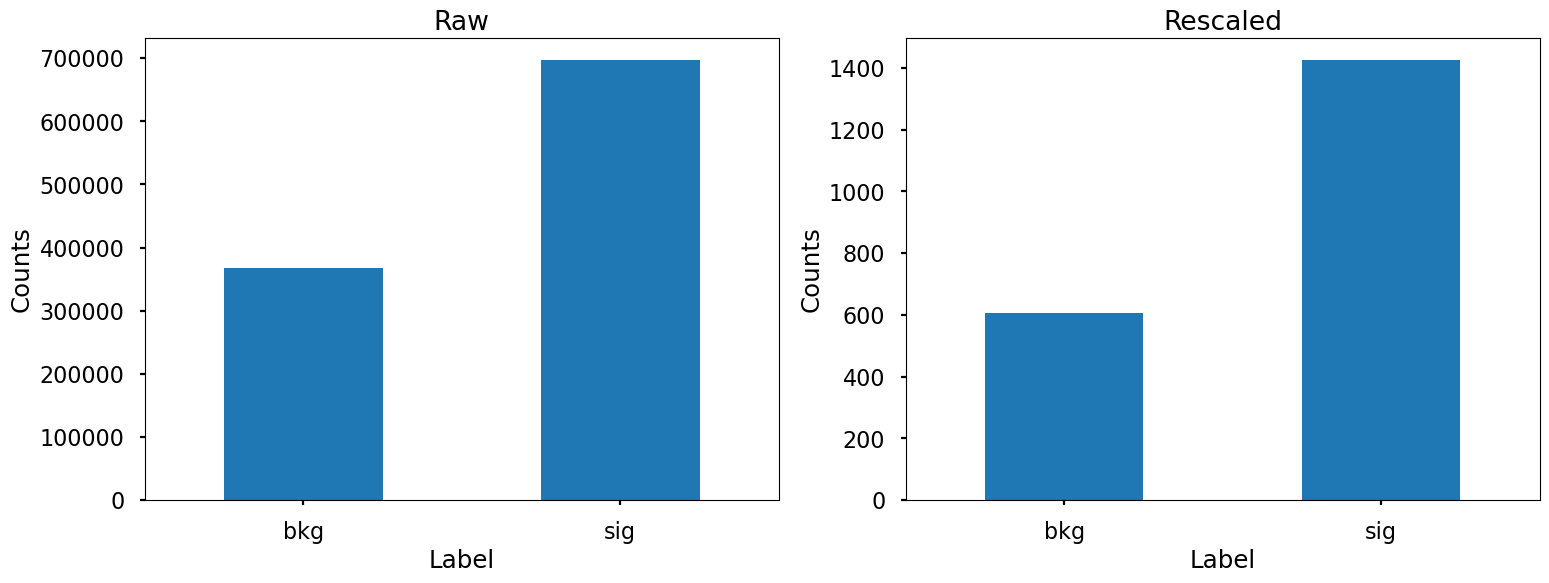

In [ ]:
plt.style.use('seaborn-v0_8-poster')
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
mc_df['label'].value_counts().sort_values().plot(kind='bar')
plt.title('Raw')

plt.subplot(1, 2, 2)
# Plot the sum of rescaled weights for each label
mc_df.groupby('label')['rescaled_weight'].sum().plot(kind='bar')
plt.title('Rescaled')

# Aesthetics
x_labels = ['bkg', 'sig']
for ax in plt.gcf().axes:
    ax.set_xlabel('Label')
    ax.set_xticklabels(x_labels, rotation=0)
    ax.set_ylabel('Counts')


### Study of each individual cut

1. ll mass between 10 GeV around Z mass

In [ ]:
if 'zdiff' not in mc_df.columns: 
    mc_df.insert(1, 'zdiff', abs(mc_df['mLL'] - Z_MASS))

In [ ]:
# Raw counts:
cut_sig = mc_df.eval('label == 1 and zdiff >= 10').sum() / mc_df.eval('label == 1').sum()
rem_bkg = mc_df.eval('label == 0 and zdiff < 10').sum() / mc_df.eval('label == 0').sum()
# Rescaled counts:
cut_sig_rescaled = mc_df.query('label == 1 and zdiff >= 10')['rescaled_weight'].sum() / mc_df.query('label == 1')['rescaled_weight'].sum()
rem_bkg_rescaled = mc_df.query('label == 0 and zdiff < 10')['rescaled_weight'].sum() / mc_df.query('label == 0')['rescaled_weight'].sum()

print(f'Percentage of signal events cut due to zdiff < 10: {cut_sig_rescaled:.2%} (raw: {cut_sig:.2%})')
print(f'Percentage of background events remaining after cut zdiff < 10: {rem_bkg_rescaled:.2%} (raw: {rem_bkg:.2%})')

Percentage of signal events cut due to zdiff < 10: 10.93% (raw: 11.26%)
Percentage of background events remaining after cut zdiff < 10: 68.37% (raw: 79.59%)


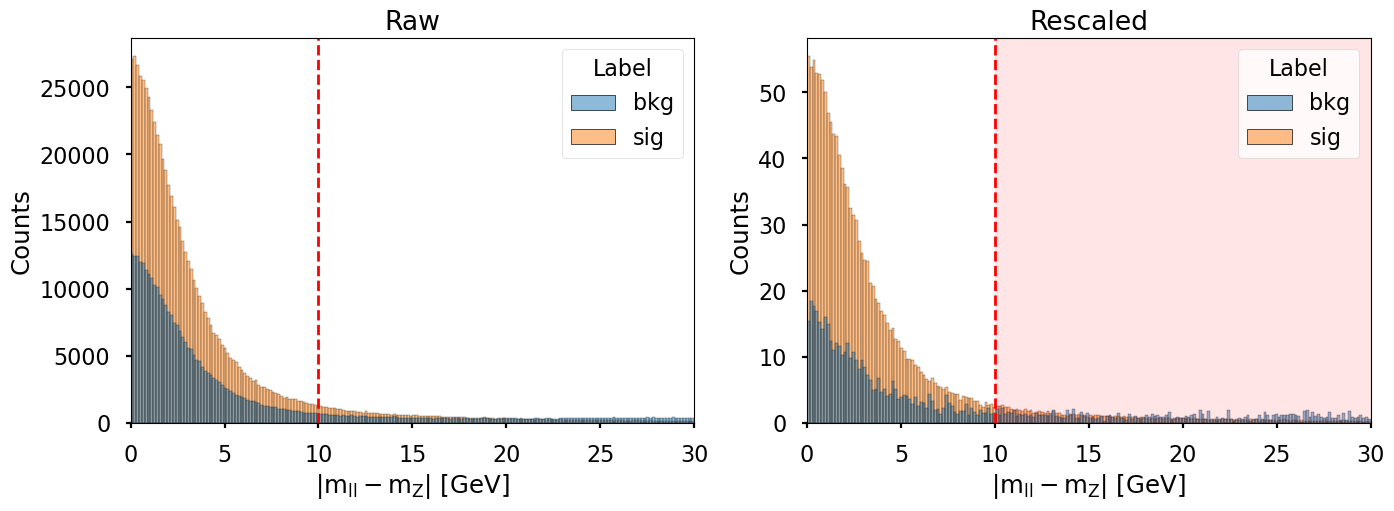

In [ ]:
plt.style.use('seaborn-v0_8-poster')
plt.figure(figsize=(16, 5))

plt.subplot(1, 2, 1)
sns.histplot(mc_df, x='zdiff', hue='label', binrange=(0, 30), bins=200)
plt.axvline(10, color='r', linestyle='--', linewidth=2)
plt.title('Raw')

plt.subplot(1, 2, 2)
sns.histplot(mc_df, x='zdiff', hue='label', binrange=(0, 30), weights='rescaled_weight', bins=200)
plt.axvline(10, color='r', linestyle='--', linewidth=2)
plt.axvspan(10, 30, color='r', alpha=0.1)
plt.title('Rescaled')

# Aesthetics
labels = ['bkg', 'sig']
for ax in plt.gcf().axes:
    ax.set_xlabel(r'$|\mathrm{m}_\mathrm{ll} - \mathrm{m}_\mathrm{Z}|$ [GeV]')
    ax.set_ylabel('Counts')
    ax.set_xlim(0, 30)
    leg = ax.get_legend()
    leg.set_title('Label', prop={'size': 16})
    for t, l in zip(leg.texts, labels):
        t.set_text(l)

2. mtW > 30 GeV

In [ ]:
# Raw counts:
cut_sig = mc_df.eval('label == 1 and mtW <= 30').sum() / mc_df.eval('label == 1').sum()
rem_bkg = mc_df.eval('label == 0 and mtW > 30').sum() / mc_df.eval('label == 0').sum()
# Rescaled counts:
cut_sig_rescaled = mc_df.query('label == 1 and mtW <= 30')['rescaled_weight'].sum() / mc_df.query('label == 1')['rescaled_weight'].sum()
rem_bkg_rescaled = mc_df.query('label == 0 and mtW > 30')['rescaled_weight'].sum() / mc_df.query('label == 0')['rescaled_weight'].sum()

print(f'Percentage of signal events cut due to mtW > 30: {cut_sig_rescaled:.2%} (raw: {cut_sig:.2%})')
print(f'Percentage of background events remaining after cut mtW > 30: {rem_bkg_rescaled:.2%} (raw: {rem_bkg:.2%})')

Percentage of signal events cut due to mtW > 30: 15.52% (raw: 16.63%)
Percentage of background events remaining after cut mtW > 30: 51.86% (raw: 60.75%)


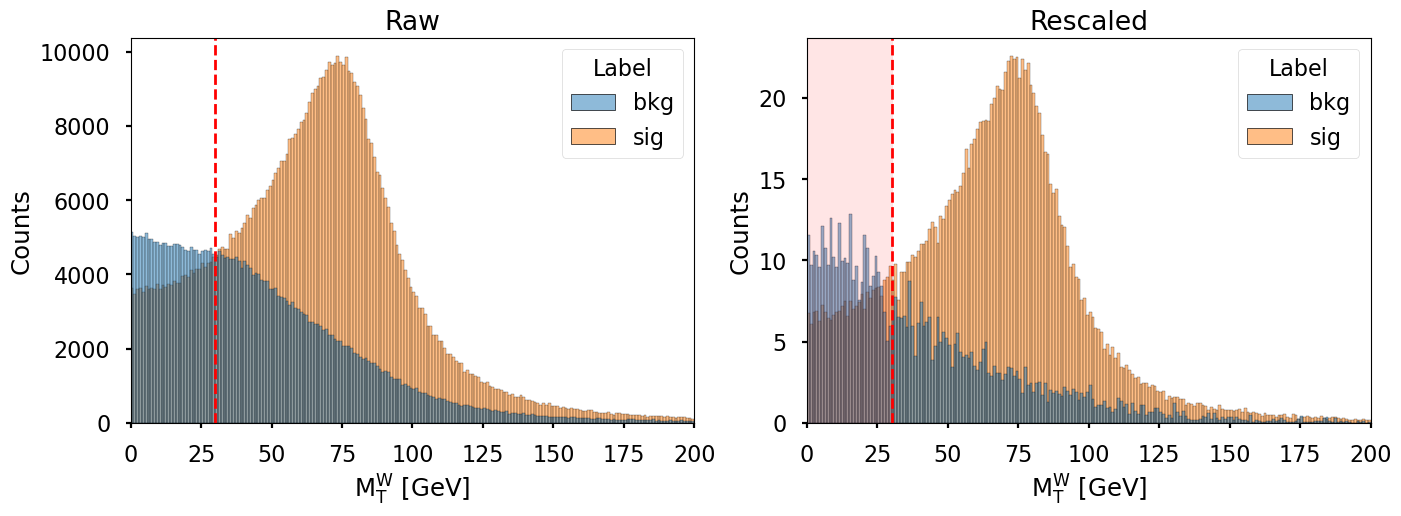

In [ ]:
plt.style.use('seaborn-v0_8-poster')
plt.figure(figsize=(16, 5))

plt.subplot(1, 2, 1)
sns.histplot(mc_df, x='mtW', hue='label', binrange=(0, 200), bins=200)
plt.axvline(30, color='r', linestyle='--', linewidth=2)
plt.title('Raw')

plt.subplot(1, 2, 2)
sns.histplot(mc_df, x='mtW', hue='label', binrange=(0, 200), weights='rescaled_weight', bins=200)
plt.axvline(30, color='r', linestyle='--', linewidth=2)
plt.axvspan(0, 30, color='r', alpha=0.1)
plt.title('Rescaled')

# Aesthetics
labels = ['bkg', 'sig']
for ax in plt.gcf().axes:
    ax.set_xlabel(r'$\mathrm{M}_\mathrm{T}^{\mathrm{W}}$ [GeV]')
    ax.set_ylabel('Counts')
    ax.set_xlim(0, 200)
    leg = ax.get_legend()
    leg.set_title('Label', prop={'size': 16})
    for t, l in zip(leg.texts, labels):
        t.set_text(l)

3. Etmiss > 30 GeV

In [ ]:
# Raw counts
cut_sig = mc_df.eval('label == 1 and etmiss <= 30').sum() / mc_df.eval('label == 1').sum()
rem_bkg = mc_df.eval('label == 0 and etmiss > 30').sum() / mc_df.eval('label == 0').sum()
# Rescaled counts
cut_sig_rescaled = mc_df.query('label == 1 and etmiss <= 30')['rescaled_weight'].sum() / mc_df.query('label == 1')['rescaled_weight'].sum()
rem_bkg_rescaled = mc_df.query('label == 0 and etmiss > 30')['rescaled_weight'].sum() / mc_df.query('label == 0')['rescaled_weight'].sum()

print(f'Percentage of signal events cut due to etmiss > 30: {cut_sig_rescaled:.2%} (raw: {cut_sig:.2%})')
print(f'Percentage of background events remaining after cut etmiss > 30: {rem_bkg_rescaled:.2%} (raw: {rem_bkg:.2%})')

Percentage of signal events cut due to etmiss > 30: 26.27% (raw: 23.99%)
Percentage of background events remaining after cut etmiss > 30: 41.65% (raw: 43.17%)


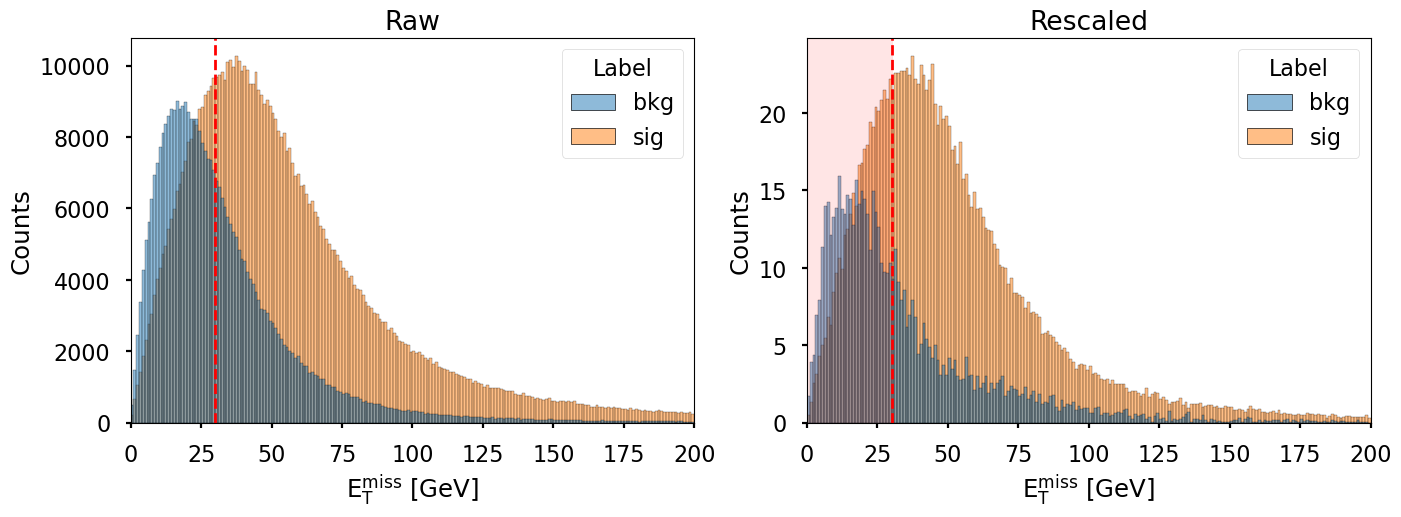

In [ ]:
plt.style.use('seaborn-v0_8-poster')
plt.figure(figsize=(16, 5))

plt.subplot(1, 2, 1)
sns.histplot(mc_df, x='etmiss', hue='label', binrange=(0, 200), bins=200)
plt.axvline(30, color='r', linestyle='--', linewidth=2)
plt.title('Raw')

plt.subplot(1, 2, 2)
sns.histplot(mc_df, x='etmiss', hue='label', binrange=(0, 200), weights='rescaled_weight', bins=200)
plt.axvline(30, color='r', linestyle='--', linewidth=2)
plt.axvspan(0, 30, color='r', alpha=0.1)

plt.title('Rescaled')

# Aesthetics
labels = ['bkg', 'sig']
for ax in plt.gcf().axes:
    ax.set_xlabel(r'$\mathrm{E}_\mathrm{T}^{\mathrm{miss}}$ [GeV]')
    ax.set_ylabel('Counts')
    ax.set_ylim(bottom=0)
    ax.set_xlim(0, 200)
    leg = ax.get_legend()
    leg.set_title('Label', prop={'size': 16})
    for t, l in zip(leg.texts, labels):
        t.set_text(l)

4. ptlep > 25 GeV for any lep

In [ ]:
# Raw counts
cut_sig = mc_df.eval('label == 1 and lep1_pt <= 25').sum() / mc_df.eval('label == 1').sum()
rem_bkg = mc_df.eval('label == 0 and lep1_pt > 25').sum() / mc_df.eval('label == 0').sum()
# Rescaled counts
cut_sig_rescaled = mc_df.query('label == 1 and lep1_pt <= 25')['rescaled_weight'].sum() / mc_df.query('label == 1')['rescaled_weight'].sum()
rem_bkg_rescaled = mc_df.query('label == 0 and lep1_pt > 25')['rescaled_weight'].sum() / mc_df.query('label == 0')['rescaled_weight'].sum()

print(f'Percentage of signal events cut due to lep1_pt > 25: {cut_sig_rescaled:.2%} (raw: {cut_sig:.2%})')
print(f'Percentage of background events remaining after cut lep1_pt > 25: {rem_bkg_rescaled:.2%} (raw: {rem_bkg:.2%})')

print(f'Minimum lepton momentum in dataset: {mc_df["lep1_pt"].min()} GeV')

Percentage of signal events cut due to lep1_pt > 25: 0.00% (raw: 0.00%)
Percentage of background events remaining after cut lep1_pt > 25: 100.00% (raw: 100.00%)
Minimum lepton momentum in dataset: 25.0009 GeV


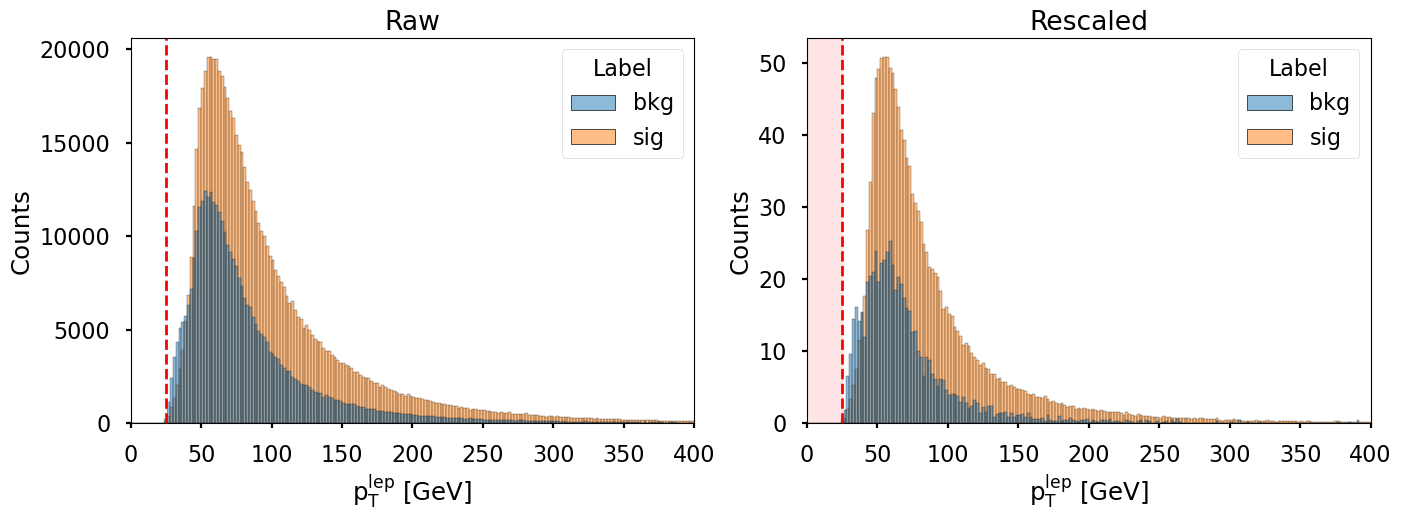

In [ ]:
plt.style.use('seaborn-v0_8-poster')
plt.figure(figsize=(16, 5))

plt.subplot(1, 2, 1)
sns.histplot(mc_df, x='lep1_pt', hue='label', binrange=(0, 400), bins=200)
plt.axvline(25, color='r', linestyle='--', linewidth=2)
plt.title('Raw')

plt.subplot(1, 2, 2)
sns.histplot(mc_df, x='lep1_pt', hue='label', binrange=(0, 400), weights='rescaled_weight', bins=200)
plt.axvline(25, color='r', linestyle='--', linewidth=2)
plt.axvspan(0, 25, color='r', alpha=0.1)
plt.title('Rescaled')

# Aesthetics
labels = ['bkg', 'sig']
for ax in plt.gcf().axes:
    ax.set_xlabel(r'$\mathrm{p}_\mathrm{T}^{\mathrm{lep}}$ [GeV]')
    ax.set_ylabel('Counts')
    ax.set_xlim(0, 400)
    ax.set_ylim(bottom=0)
    leg = ax.get_legend()
    leg.set_title('Label', prop={'size': 16})
    for t, l in zip(leg.texts, labels):
        t.set_text(l)

#### All cuts

In [ ]:
# Raw counts 
rem_sig = mc_df.eval('zdiff < 10 and etmiss > 30 and mtW > 30 and lep1_pt > 25 and label == 1').sum() / mc_df.eval('label == 1').sum()
rem_bkg = mc_df.eval('zdiff < 10 and etmiss > 30 and mtW > 30 and lep1_pt > 25 and label == 0').sum() / mc_df.eval('label == 0').sum()
# Rescaled counts
rem_sig_rescaled = mc_df.query('zdiff < 10 and etmiss > 30 and mtW > 30 and lep1_pt > 25 and label == 1')['rescaled_weight'].sum() / mc_df.query('label == 1')['rescaled_weight'].sum()
rem_bkg_rescaled = mc_df.query('zdiff < 10 and etmiss > 30 and mtW > 30 and lep1_pt > 25 and label == 0')['rescaled_weight'].sum() / mc_df.query('label == 0')['rescaled_weight'].sum()

print(f'Percentage of signal events remaining after cuts: {rem_sig_rescaled:.2%} (raw: {rem_sig:.2%})')
print(f'Percentage of background events remaining after cuts: {rem_bkg_rescaled:.2%} (raw: {rem_bkg:.2%})')

Percentage of signal events remaining after cuts: 58.04% (raw: 58.31%)
Percentage of background events remaining after cuts: 17.72% (raw: 24.61%)


In [ ]:
confusion_matrix = mc_df.groupby(['label', mc_df.eval('zdiff < 10 and etmiss > 30 and mtW > 30 and lep1_pt > 25')])['rescaled_weight'].sum().unstack().T
confusion_matrix.index = ['cut', 'pass']
confusion_matrix.columns = ['bkg', 'sig']
confusion_matrix

,bkg,sig
cut,499.114598,597.975498
pass,107.504340,827.221301


In [ ]:
normalized_cm = confusion_matrix / confusion_matrix.sum().sum()
normalized_cm

,bkg,sig
cut,0.24565,0.294306
pass,0.05291,0.407134


In [ ]:
confusion_matrix = np.array([[confusion_matrix.loc['cut', 'bkg'], confusion_matrix.loc['pass', 'bkg']],
                    [confusion_matrix.loc['cut', 'sig'], confusion_matrix.loc['pass', 'sig']]])
confusion_matrix

array([[499.11459783, 107.5043402 ],
       [597.97549837, 827.22130064]])

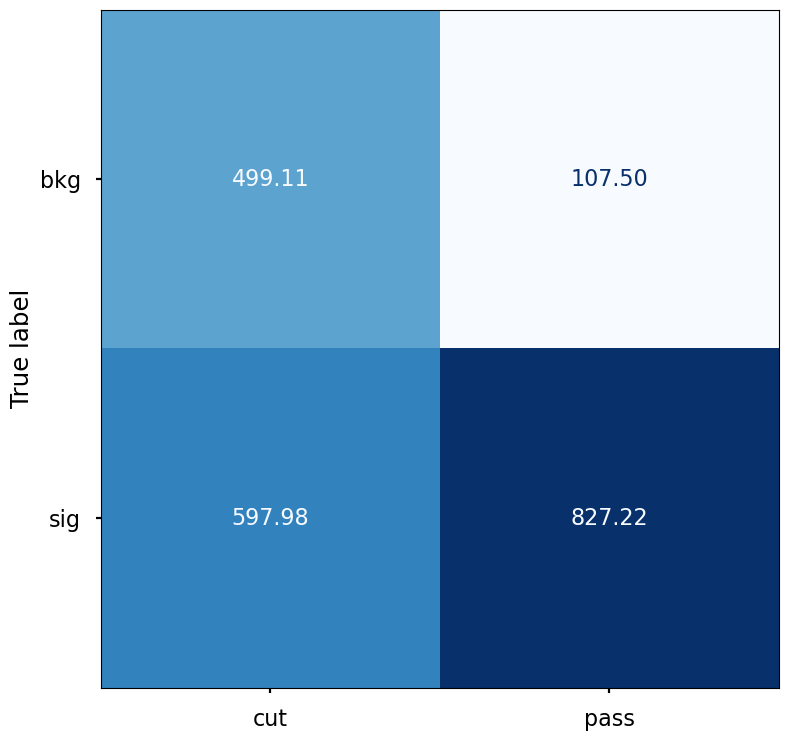

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(confusion_matrix, display_labels=['bkg', 'sig']).plot(cmap='Blues', values_format='.2f', colorbar=False)
ax = plt.gca()
ax.set_xticklabels(['cut', 'pass'])
ax.set_xlabel('')
# Change the fontsize inside the matrix
for text in ax.texts:
    text.set_fontsize(16)


In [ ]:
print(f'#signals / #backgrounds: {confusion_matrix.loc["pass", "sig"] / confusion_matrix.loc["pass", "bkg"]:.2f}')

#signals / #backgrounds: 7.69


**Result to beat:** 7.69 signal to background ratio while getting around 827 signals 
(rescaled with the rescaling weights and considering 1064548 events)  
This corresponds to a precision of about 88.5%

In [ ]:
cuts = ['zdiff', 'etmiss', 'mtW', 'lep1_pt']
conds = [f'< 10', f'> 30', f'> 30', f'> 25']
props_sig, props_bkg = [], []
for cut, cond in zip(cuts, conds):
    prop_sig = mc_df.query(f'{cut} {cond} and label == 1')['rescaled_weight'].sum() / mc_df.query('label == 1')['rescaled_weight'].sum()
    prop_bkg = mc_df.query(f'{cut} {cond} and label == 0')['rescaled_weight'].sum() / mc_df.query('label == 0')['rescaled_weight'].sum()
    props_sig.append(1 - prop_sig)
    props_bkg.append(1 - prop_bkg)
props_sig, props_bkg

([0.10929372403590287, 0.2627469612557818, 0.15517866278786097, 0.0],
 [0.3162926756838501, 0.5834758220674108, 0.48135301895514293, 0.0])

In [ ]:
# Now go sequentially in the cuts (starting by most restricitive) and find how much the next cut reduces the number of events
order = np.argsort(props_sig)[::-1]
# order cuts and conds using order
cuts = [cuts[i] for i in order]
conds = [conds[i] for i in order]

props_sig_seq, props_bkg_seq = [], []
for i in range(len(cuts)):
    cond = ' and '.join(f'{cuts[j]} {conds[j]}' for j in range(i + 1))
    prop_sig = mc_df.query(cond + 'and label==1')['rescaled_weight'].sum() / mc_df.query('label == 1')['rescaled_weight'].sum()
    prop_bkg = mc_df.query(cond + 'and label==0')['rescaled_weight'].sum() / mc_df.query('label == 0')['rescaled_weight'].sum()
    print(f'Cut: {cut} {cond}, signal reduction: {1 - prop_sig:.2%}, background reduction: {1 - prop_bkg:.2%}')
    props_sig_seq.append(1 - prop_sig)
    props_bkg_seq.append(1 - prop_bkg)
props_sig_seq = np.diff(props_sig_seq, prepend=0)
props_bkg_seq = np.diff(props_bkg_seq, prepend=0)

Cut: lep1_pt etmiss > 30, signal reduction: 26.27%, background reduction: 58.35%
Cut: lep1_pt etmiss > 30 and mtW > 30, signal reduction: 35.04%, background reduction: 70.38%
Cut: lep1_pt etmiss > 30 and mtW > 30 and zdiff < 10, signal reduction: 41.96%, background reduction: 82.28%
Cut: lep1_pt etmiss > 30 and mtW > 30 and zdiff < 10 and lep1_pt > 25, signal reduction: 41.96%, background reduction: 82.28%


In [ ]:
props_sig_seq, props_bkg_seq

(array([0.26274696, 0.08769048, 0.06913655, 0.        ]),
 array([0.58347582, 0.12030845, 0.11899683, 0.        ]))

<matplotlib.legend.Legend>

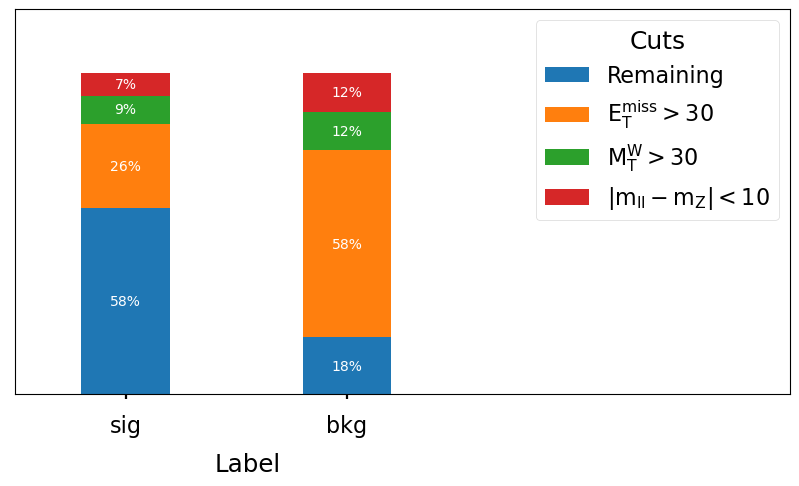

In [ ]:
plt.style.use('seaborn-v0_8-poster')
plt.figure(figsize=(10, 5))

x_pos = [-0.75, -0.25]

total_sig_cuts, total_bkg_cuts = sum(props_sig_seq), sum(props_bkg_seq)
plt.bar(x_pos, [1-total_sig_cuts, 1-total_bkg_cuts], bottom=0, label='remaining', width=0.2)
plt.text(x_pos[0], (1-total_sig_cuts)/2, f'{1-total_sig_cuts:.0%}', ha='center', va='center', color='white')
plt.text(x_pos[1], (1-total_bkg_cuts)/2, f'{1-total_bkg_cuts:.0%}', ha='center', va='center', color='white')
bottom = [1 - total_sig_cuts, 1-total_bkg_cuts]
for cut, prop_sig, prop_bkg in zip(cuts, props_sig_seq, props_bkg_seq):
    if cut == 'lep1_pt': continue
    plt.bar(x_pos, [prop_sig, prop_bkg], bottom=bottom, label=cut, width=0.2)
    if prop_sig > 0: plt.text(-0.75, bottom[0] + prop_sig/2, f'{prop_sig:.0%}', ha='center', va='center', color='white')
    if prop_bkg > 0: plt.text(-0.25, bottom[1] + prop_bkg/2, f'{prop_bkg:.0%}', ha='center', va='center', color='white')
    bottom[0] += prop_sig
    bottom[1] += prop_bkg

ax = plt.gca()
plt.xlim(-1, 0.75)
plt.ylim(0, 1.2)
plt.xlabel('Label')
plt.xticks(x_pos, ['sig', 'bkg'])
ax.axes.get_yaxis().set_visible(False)
ax.xaxis.set_label_coords(0.3, -0.15)

labels = ['Remaining', r'$\mathrm{E}_\mathrm{T}^\mathrm{miss} > 30$', 
          r'$\mathrm{M}_\mathrm{T}^\mathrm{W} > 30$', r'$|\mathrm{m}_\mathrm{ll} - \mathrm{m}_\mathrm{Z}| < 10$',
          r'$\mathrm{p}_\mathrm{T}^\mathrm{any~lep} > 25$']
# use labels for the legend
plt.legend(labels, title='Cuts', title_fontsize=18)

### Save data

In [ ]:
data_path = path/'data'
# Save data to use in ML models
mc_df = mc_df.drop(columns=['channel', 'weight'])
mc_df.to_pickle(data_path/'df_mc.pkl')